# Advertising Predict

Kaggle Data Modeling

download csv file:
https://www.kaggle.com/datasets/tbyrnes/advertising?resource=download

Data Types
* Daily Time Spent on Site: 웹에 머문 시간
* Age: 나이
* Area Income: 소득
* Daily Internet Usage: 하루 평균 인터넷 사용 시간
* Ad Topic Line: 광고 주제
* City: 도시
* Male: 성별
* Country: 국가
* Timestamp: 시간
* **Clicke on Ad: 광고 클릭 여부(결과)**

In [ ]:
# load train, test dataset
import pandas as pd
datasets = pd.read_csv('/content/advertising.csv')

In [ ]:
datasets.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
datasets.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
def bar_chart(feature):
  clicked = datasets[datasets['Clicked on Ad']==1][feature].value_counts()
  unclicked = datasets[datasets['Clicked on Ad']==0][feature].value_counts()
  df = pd.DataFrame([clicked,unclicked])
  df.index = ["Clicked","Unclicked"]
  df.plot(kind="bar",stacked=True,figsize=(10,5))

**Sex**

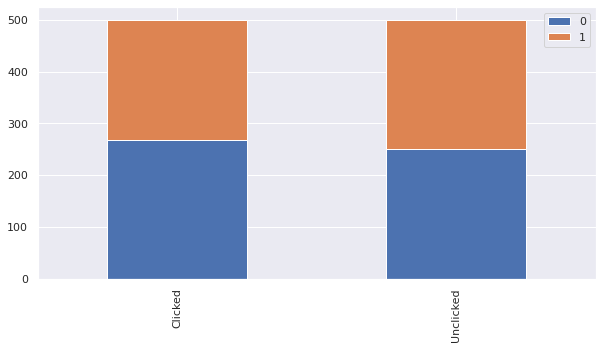

In [ ]:
bar_chart('Male')

확인한 결과 성별은 광고 클릭 여부에 큰 영향을 주지 않았다.

**Age**

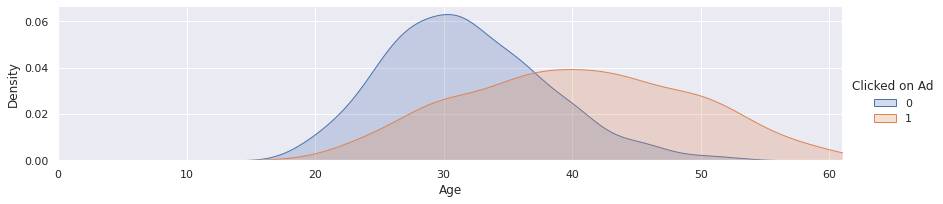

In [ ]:
facet = sns.FacetGrid(datasets, hue="Clicked on Ad",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,datasets['Age'].max()))
facet.add_legend()

plt.show()

확인한 결과 청년 층이 장년에 비해 광고 클릭 수가 낮은 걸 알 수 있다.

**Daily Time Spent on Site & Daily Internet Usage**

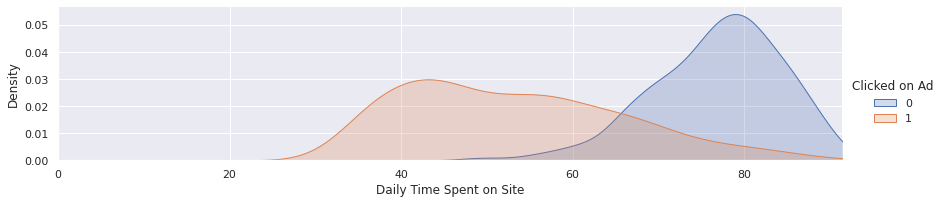

In [ ]:
facet = sns.FacetGrid(datasets, hue="Clicked on Ad",aspect=4)
facet.map(sns.kdeplot,'Daily Time Spent on Site',shade=True)
facet.set(xlim=(0,datasets['Daily Time Spent on Site'].max()))
facet.add_legend()

plt.show()

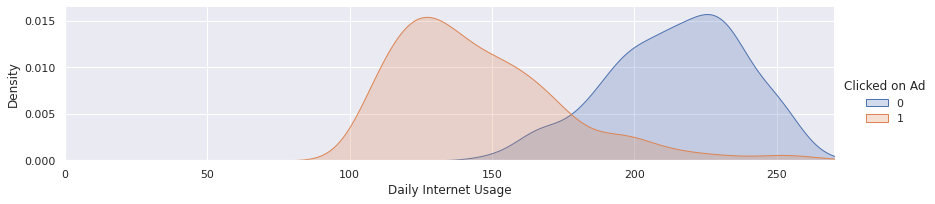

In [ ]:
facet = sns.FacetGrid(datasets, hue="Clicked on Ad",aspect=4)
facet.map(sns.kdeplot,'Daily Internet Usage',shade=True)
facet.set(xlim=(0,datasets['Daily Internet Usage'].max()))
facet.add_legend()

plt.show()

하루에 해당 웹 페이지에 머무는 시간과 인터넷 사용 시간이 많을 수록 광고 클릭을 하지 않는다는 것을 알 수 있다.

**Area Income**

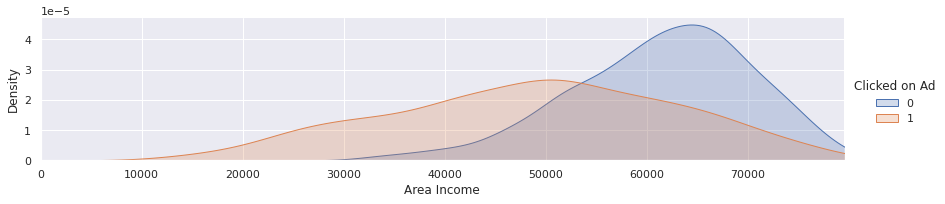

In [ ]:
facet = sns.FacetGrid(datasets, hue="Clicked on Ad",aspect=4)
facet.map(sns.kdeplot,'Area Income',shade=True)
facet.set(xlim=(0,datasets['Area Income'].max()))
facet.add_legend()

plt.show()

소득이 적은 사람일수록 광고 클릭을 하는 것으로 보인다.

**Timestamp**

In [ ]:
import datetime

datasets['Timestamp'] = [str(x)[-8:-6] for x in datasets['Timestamp']]

In [ ]:
datasets['Timestamp'] = [int(x) for x in datasets['Timestamp']]

In [ ]:
def non_stack_bar_chart(feature):
  clicked = datasets[datasets['Clicked on Ad']==1][feature].value_counts()
  unclicked = datasets[datasets['Clicked on Ad']==0][feature].value_counts()
  df = pd.DataFrame([clicked,unclicked])
  df.index = ["Clicked","Unclicked"]
  df.plot(kind="bar",stacked=False,figsize=(10,5))

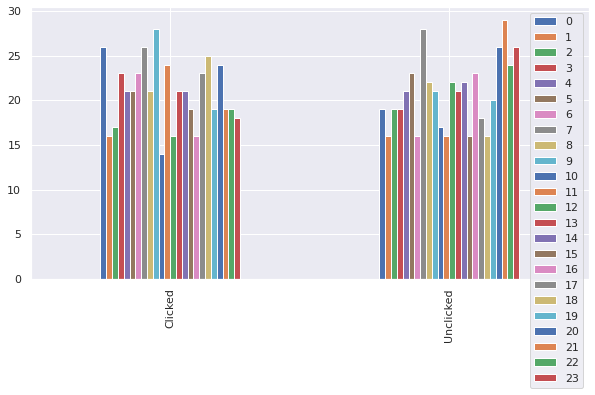

In [ ]:
non_stack_bar_chart('Timestamp')

특정 시간대에 클릭을 하지 않기 때문에 시간 역시 큰 영향을 주지 않는 것을 알 수 있다.

광고 주제와 도시, 국가, 시간, 성별은 광고 클릭 여부에 큰 영향을 끼치지 않는다. 영향을 크게 끼치지 않는 데이터들은 학습 전에 제거한다.

In [ ]:
datasets = datasets.drop(['Ad Topic Line','City','Country','Timestamp','Male'],axis=1)

In [ ]:
datasets.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


# Modelling

In [ ]:
# Split X and y
y = datasets['Clicked on Ad']
X = datasets.drop(['Clicked on Ad'],axis=1)

In [ ]:
# split train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=1004)

**Classifier**

우선 분류 문제로 인식하고 모델링을 하겠다

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

**KNeighborsClassifier**

In [ ]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.8    0.6625 0.7    0.7625 0.6625 0.7125 0.75   0.7125 0.8    0.7   ]


In [ ]:
round(np.mean(score)*100,2)

72.62

**Decision Tree**

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.9375 0.925  0.925  0.9375 0.9375 0.875  0.9625 1.     0.975  0.9375]


In [ ]:
round(np.mean(score)*100,2)

94.12

**Random Forest**

In [ ]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.9375 0.9375 0.975  0.95   0.9875 0.95   0.975  1.     0.95   0.9875]


In [ ]:
round(np.mean(score)*100,2)

96.5

**Naive Bayes**

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.9625 0.95   0.9875 0.95   0.9625 0.9375 0.975  1.     0.9625 0.975 ]


In [ ]:
round(np.mean(score)*100,2)

96.62

**SVM**

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.775  0.6    0.6625 0.7    0.7125 0.75   0.75   0.6625 0.85   0.725 ]


In [ ]:
round(np.mean(score)*100,2)

71.87

**Naive Bayes**가 가장 큰 정확도를 보여주었다.

이번에는 Logistic Regression을 통해 모델링을 해보겠다.

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(lr,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.9    0.8625 0.9125 0.875  0.9625 0.8375 0.975  0.9125 0.9625 0.975 ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
round(np.mean(score)*100,2)

91.75

**Naive Bayes** 분류기가 가장 좋은 성능을 보였기 때문에 테스트를 Naive Bayes로 해보겠다.

# Test

In [ ]:
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.98      0.98      0.98       108

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



98%라는 결과를 도출해냈다.

# Deep Learning

In [47]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [48]:
datasets = pd.read_csv('/content/advertising.csv')

In [49]:
datasets = datasets.drop(['Ad Topic Line','City','Country','Timestamp','Male'],axis=1)

In [50]:
datasets.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


In [51]:
y = datasets['Clicked on Ad'].to_numpy()
X = datasets.drop(['Clicked on Ad'],axis=1).to_numpy()

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=1004)

In [53]:
# 정규화
spent_min = np.min(X[:,0])
spent_max = np.max(X[:,0])
X_train[:,0] = (X_train[:,0] - spent_min)/(spent_max-spent_min)
X_test[:,0] = (X_test[:,0] - spent_min)/(spent_max-spent_min)

age_min = np.min(X[:,1])
age_max = np.max(X[:,1])
X_train[:,1] = (X_train[:,1] - age_min)/(age_max-age_min)
X_test[:,1] = (X_test[:,1] - age_min)/(age_max-age_min)

income_min = np.min(X[:,2])
income_max = np.max(X[:,2])
X_train[:,2] = (X_train[:,2] - income_min)/(income_max-income_min)
X_test[:,2] = (X_test[:,2] - income_min)/(income_max-income_min)

usage_min = np.min(X[:,3])
usage_max = np.max(X[:,3])
X_train[:,3] = (X_train[:,3] - usage_min)/(usage_max-usage_min)
X_test[:,3] = (X_test[:,3] - usage_min)/(usage_max-usage_min)

* 이진 분류 > 마지막 Sigmoid 활성화 함수
* 손실 함수 : binary cross Entropy
* compile에 metrics 넣어 기주 정해줌 > 분류

In [54]:
model = keras.Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [55]:
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [56]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=50, batch_size=10)

Epoch 1/50
80/80 [==============================] - 1s 5ms/step - loss: 0.2833 - binary_accuracy: 0.8963 - val_loss: 0.1289 - val_binary_accuracy: 0.9500
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1368 - binary_accuracy: 0.9588 - val_loss: 0.1008 - val_binary_accuracy: 0.9600
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1344 - binary_accuracy: 0.9538 - val_loss: 0.1292 - val_binary_accuracy: 0.9700
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1168 - binary_accuracy: 0.9638 - val_loss: 0.1267 - val_binary_accuracy: 0.9500
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1216 - binary_accuracy: 0.9563 - val_loss: 0.1160 - val_binary_accuracy: 0.9750
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.1242 - binary_accuracy: 0.9550 - val_loss: 0.1013 - val_binary_accuracy: 0.9750
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.11

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (10, 128)                 640       
                                                                 
 dense_1 (Dense)             (10, 64)                  8256      
                                                                 
 dense_2 (Dense)             (10, 32)                  2080      
                                                                 
 dense_3 (Dense)             (10, 16)                  528       
                                                                 
 dense_4 (Dense)             (10, 1)                   17        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [58]:
pred = model.predict(X_test).reshape(X_test.shape[0])
pred = np.where(pred > 0.5, 1, 0)
accuracy = 1 - (np.where((pred - y_test)==0,0,1).sum()/len(y_test))
print("Accuracy:",accuracy)

Accuracy: 0.97
